<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/ISP_in_Germany_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Dataset
data = {
    "Levels of German Language Obtained": ["A2", "A1", "A2", "A2", "A1, A2", "A1", "A1", "B1", "A2", "B1"],
    "Employment Status": ["Student", "Student, Unemployed", "Employed", "Personal", "Student", "Employed", "Student", "Employed", "Student", "Student, Employed"],
    "State / District of Residence in Deutschland": ["", "Berlin, Hellersdorf", "Brandenburg", "Berlin", "Brandenburg", "Saxony Anhalt", "Berlin", "North Rhein Westfalien", "Marzahn", "Brandenburg"],
    "Name of Institution": ["", "Berlin School of Business Innovation", "Potsdam University", "Personal", "BTU", "Otto von Guericke Universität", "Berlin School of Business Innovation", "University of Siegen", "Berlin School of Business Innovation", "Unikassel"],
    "Course of Study": ["", "Global MBA", "Biology", "Law", "Cybersecurity", "Chemical Engineering", "Digital marketing", "Human computer interaction", "Data Analytics", "IFBC"],
    "Religion": ["Christianity", "Christianity", "Christianity", "Christianity", "Christianity", "Christianity", "Christianity", "Christianity", "Christianity", "Christianity"],
    "Spoken Languages": ["English", "English", "English", "English", "English", "English", "English", "English, German", "English", "English, German"],
    "Satisfaction Level": [1, 4, 4, 4, 3, 4, 5, 4, 4, 3]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


  Levels of German Language Obtained    Employment Status  \
0                                 A2              Student   
1                                 A1  Student, Unemployed   
2                                 A2             Employed   
3                                 A2             Personal   
4                             A1, A2              Student   

  State / District of Residence in Deutschland  \
0                                                
1                          Berlin, Hellersdorf   
2                                  Brandenburg   
3                                       Berlin   
4                                  Brandenburg   

                    Name of Institution Course of Study      Religion  \
0                                                        Christianity   
1  Berlin School of Business Innovation      Global MBA  Christianity   
2                    Potsdam University         Biology  Christianity   
3                              Personal 

In [ ]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   Satisfaction Level  Levels of German Language Obtained_A1  \
0                   1                                  False   
1                   4                                   True   
2                   4                                  False   
3                   4                                  False   
4                   3                                  False   

   Levels of German Language Obtained_A1, A2  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                       True   

   Levels of German Language Obtained_A2  \
0                                   True   
1                                  False   
2                                   True   
3                                   True   
4                                  False   

   Levels of German Language Obtained_B1  Employment Status_E

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop("Satisfaction Level", axis=1)  # Features
y = df_encoded["Satisfaction Level"]  # Target variable

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (10, 37)
Shape of y: (10,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict the satisfaction level on the testing data
y_pred = gb_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.03388835169177021
R-squared (R2) Score: 0.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Display the evaluation metrics of the best model
print("\nBest Model Evaluation:")
print("Mean Squared Error (MSE):", mse_best)
print("R-squared (R2) Score:", r2_best)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

Best Model Evaluation:
Mean Squared Error (MSE): 0.007867349727403392
R-squared (R2) Score: 0.0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(learning_rate=0.2, max_depth=3, n_estimators=100)

# Initialize RFE with Gradient Boosting Regressor
rfe = RFE(estimator=gb_regressor, n_features_to_select=10)  # Select 10 most important features

# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]

# Train the model using only the selected features
gb_regressor.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test[selected_features])

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Selected Features:", selected_features)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Selected Features: Index(['Levels of German Language Obtained_A2', 'Employment Status_Employed',
       'Employment Status_Student',
       'State / District of Residence in Deutschland_',
       'State / District of Residence in Deutschland_Berlin',
       'State / District of Residence in Deutschland_Brandenburg',
       'Name of Institution_', 'Name of Institution_Potsdam University',
       'Course of Study_', 'Course of Study_Digital marketing'],
      dtype='object')
Mean Squared Error (MSE): 0.10755588423753012
R-squared (R2) Score: 0.0


In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)


Levels of German Language Obtained_A1                                  bool
Levels of German Language Obtained_A1, A2                              bool
Levels of German Language Obtained_A2                                  bool
Levels of German Language Obtained_B1                                  bool
Employment Status_Employed                                             bool
Employment Status_Personal                                             bool
Employment Status_Student                                              bool
Employment Status_Student, Employed                                    bool
Employment Status_Student, Unemployed                                  bool
State / District of Residence in Deutschland_                          bool
State / District of Residence in Deutschland_Berlin                    bool
State / District of Residence in Deutschland_Berlin, Hellersdorf       bool
State / District of Residence in Deutschland_Brandenburg               bool
State / Dist

In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   Satisfaction Level  Levels of German Language Obtained_A1, A2  \
0                   1                                      False   
1                   4                                      False   
2                   4                                      False   
3                   4                                      False   
4                   3                                       True   

   Levels of German Language Obtained_A2  \
0                                   True   
1                                  False   
2                                   True   
3                                   True   
4                                  False   

   Levels of German Language Obtained_B1  Employment Status_Personal  \
0                                  False                       False   
1                                  False                       False   
2                                  False                       False   
3                                  Fal

In [ ]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(df, drop_first=True)


In [ ]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt')

# Perform one-hot encoding
df_encoded = pd.get_dummies(df)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number)   \
0                                                1.0                                                                                                           
1                                                4.0                                                                                                           
2                                                4.0                                                                                                           
3                                                4.0                                                                                                           
4                                                3.0                                                                                                           

   Timestamp_3/25/2024 23:17  Timestamp

In [ ]:
import pandas as pd

# Load the dataset from the Google Drive link
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(df.head())


         Timestamp Gender Student Age Marital Status Continent of Origin  \
0  3/25/2024 23:17   Male     46 - 55        Married              Africa   
1  3/26/2024 17:11   Male     26 - 35         Single              Africa   
2  3/26/2024 17:24   Male     26 - 35        Married              Africa   
3  3/26/2024 17:58   Male      36 -45         Single              Africa   
4  3/26/2024 18:02   Male     18 - 25         Single              Africa   

  Country of Origin (Nationality) Current Level of Education  \
0                             NaN            Master´s Degree   
1                           Ghana            Master´s Degree   
2                       Ghanaian             Doctorate / PhD   
3                        Nigeria             Master´s Degree   
4                         Nigeria          Bachelor´s Degree   

  Pursued Qualification Which type of university are you attending in Germany  \
0                   NaN                                            Private   

In [ ]:
import pandas as pd

# Load the dataset
data_url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(data_url)

# Check the column names
print(df.columns)

# Separate features (X) and target variable (y)
target_column = "On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) "
X = df.drop(columns=[target_column])
y = df[target_column]

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by faculty membe

In [ ]:
print(y_train.unique())


[4 1 3 5]


In [ ]:
# Print unique values in each column to identify non-numeric values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")


Timestamp: ['3/25/2024 23:17' '3/26/2024 17:11' '3/26/2024 17:24' '3/26/2024 17:58'
 '3/26/2024 18:02' '3/26/2024 18:10' '3/26/2024 18:11' '3/26/2024 18:12'
 '3/26/2024 18:37' '3/26/2024 18:41' '3/26/2024 20:39' '3/27/2024 5:26'
 '3/27/2024 13:16' '3/29/2024 11:40' '3/30/2024 14:00' '3/30/2024 20:37'
 '3/31/2024 0:06' '4/2/2024 11:08' '4/2/2024 12:00' '4/3/2024 12:00'
 '4/3/2024 12:09' '4/3/2024 12:10' '4/3/2024 12:14' '4/3/2024 16:02'
 '4/4/2024 3:58' '4/5/2024 6:51' '4/5/2024 21:10' '4/5/2024 22:04'
 '4/6/2024 8:21' '4/6/2024 10:37' '4/6/2024 19:43' '4/6/2024 23:17'
 '4/7/2024 17:44' '4/7/2024 18:11' '4/7/2024 18:46' '4/7/2024 18:56'
 '4/8/2024 0:42' '4/8/2024 0:52' '4/8/2024 12:03' '4/8/2024 12:28'
 '4/8/2024 12:44' '4/8/2024 12:52' '4/8/2024 13:11' '4/8/2024 13:19'
 '4/8/2024 19:32' '4/8/2024 19:46' '4/8/2024 19:54' '4/8/2024 20:06'
 '4/8/2024 20:21' '4/8/2024 20:36' '4/8/2024 20:44' '4/9/2024 19:21'
 '4/9/2024 19:28' '4/9/2024 19:33' '4/14/2024 17:01' '4/14/2024 17:09'
 '4/14/2024

In [ ]:
# Print column names to check for correctness
print(df.columns)


Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by faculty membe

In [ ]:
# Drop the target column from features
target_column = "On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) "
X = df.drop(columns=[target_column])

# Separate the target variable
y = df[target_column]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Drop non-numeric columns and target variable
X = df.drop(columns=["On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) ", "Timestamp"])
y = df["On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) "]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer with the strategy to replace missing values with the median
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the training data and transform the training target variable
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test target variable using the trained imputer
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))

# Encode categorical variables
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_encoded, y_train_imputed.ravel())

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_imputed, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.391304347826087


In [ ]:
# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


NameError: name 'Pipeline' is not defined

In [ ]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Print out the column names
print("Column Names:")
print(df.columns)


Column Names:
Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by

In [ ]:
print("Column Names:")
print(df.columns)


Column Names:
Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by

In [ ]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Print out the column names
print("Column Names:")
print(df.columns)

# Filter columns containing the word "satisfied" or "experience"
target_columns = df.filter(like='satisfied').columns
print("Potential Target Columns:")
print(target_columns)


Column Names:
Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by

In [ ]:
# Set the target column
target_column = "On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) "

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Now you can continue with your analysis using X and y


In [ ]:
# Summary statistics for numerical features
numerical_summary = df.describe()

# Count unique values for categorical features
categorical_counts = df.select_dtypes(include='object').nunique()

print("Summary Statistics for Numerical Features:")
print(numerical_summary)

print("\nCount of Unique Values for Categorical Features:")
print(categorical_counts)


Summary Statistics for Numerical Features:
       On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) 
count                                         111.000000                                                                                                        
mean                                            3.720721                                                                                                        
std                                             0.833079                                                                                                        
min                                             1.000000                                                                                                        
25%                                             3.000000                                                                                                

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Timestamp                                                                                                                                                    0
Gender                                                                                                                                                       0
Student Age                                                                                                                                                  0
Marital Status                                                                                                                                               0
Continent of Origin                                                                                                                                          0
Country of Origin (Nationality)                                                                                                                              7
Current Level of Education    

In [ ]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Define columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Fill missing values for numerical features with mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values for categorical features with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any missing values left
missing_values_count = df.isnull().sum()
print("Missing Values:")
print(missing_values_count)

# Now, we can proceed with building the predictive model.


Missing Values:
Timestamp                                                                                                                                                    0
Gender                                                                                                                                                       0
Student Age                                                                                                                                                  0
Marital Status                                                                                                                                               0
Continent of Origin                                                                                                                                          0
Country of Origin (Nationality)                                                                                                                              0
Current Level of Education    

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv"
df = pd.read_csv(url)

# Now you can start your analysis with the DataFrame 'df'


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
url = "https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())


   Gender Student Age Marital Status Continent of Origin  \
0    Male     26 - 35         Single              Africa   
1    Male     26 - 35        Married              Africa   
2    Male      36 -45         Single              Africa   
3    Male     18 - 25         Single              Africa   
4  Female     26 - 35         Single              Africa   

  Country of Origin (Nationality) Current Level of Education  \
0                           Ghana            Master´s Degree   
1                           Ghana            Doctorate / PhD   
2                         Nigeria            Master´s Degree   
3                         Nigeria          Bachelor´s Degree   
4                         Nigeria            Master´s Degree   

  Pursued Qualification Type of University  \
0       Master´s Degree            Private   
1       Master´s Degree             Public   
2       Master´s Degree             Public   
3       Master´s Degree             Public   
4       Master´s Degree 

In [ ]:
# Selecting data for male and female students
male_satisfaction = df[df['Gender'] == 'Male']['Satisfied Level']
female_satisfaction = df[df['Gender'] == 'Female']['Satisfied Level']

# Performing t-test
t_statistic, p_value = ttest_ind(male_satisfaction, female_satisfaction)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -0.9306199924596578
P-value: 0.35414507708896326


In [ ]:
# Selecting numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Printing correlation matrix
print(correlation_matrix)


                 Satisfied Level
Satisfied Level              1.0


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv")

# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation coefficients
correlation_matrix = df[numerical_columns].corr()

# Extract correlation of "Satisfied Level" with other variables
satisfied_level_correlation = correlation_matrix['Satisfied Level'].drop('Satisfied Level')

# Display the correlation coefficients
print(satisfied_level_correlation)


Series([], Name: Satisfied Level, dtype: float64)


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
# For now, let's assume there are no missing values, but we can revisit this if needed


Missing Values:
 Gender                                                                                             0
Student Age                                                                                        0
Marital Status                                                                                     0
Continent of Origin                                                                                0
Country of Origin (Nationality)                                                                    0
Current Level of Education                                                                         0
Pursued Qualification                                                                              0
Type of University                                                                                 2
Factors Influenced                                                                                 0
Information Source                                                        

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())


   Gender Student Age Marital Status Continent of Origin  \
0    Male     26 - 35         Single              Africa   
1    Male     26 - 35        Married              Africa   
2    Male      36 -45         Single              Africa   
3    Male     18 - 25         Single              Africa   
4  Female     26 - 35         Single              Africa   

  Country of Origin (Nationality) Current Level of Education  \
0                           Ghana            Master´s Degree   
1                           Ghana            Doctorate / PhD   
2                         Nigeria            Master´s Degree   
3                         Nigeria          Bachelor´s Degree   
4                         Nigeria            Master´s Degree   

  Pursued Qualification Type of University  \
0       Master´s Degree            Private   
1       Master´s Degree             Public   
2       Master´s Degree             Public   
3       Master´s Degree             Public   
4       Master´s Degree 

In [ ]:
# Check data types of columns
print(df.dtypes)

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display correlation matrix
print(correlation_matrix)


Gender                                                                                             object
Student Age                                                                                        object
Marital Status                                                                                     object
Continent of Origin                                                                                object
Country of Origin (Nationality)                                                                    object
Current Level of Education                                                                         object
Pursued Qualification                                                                              object
Type of University                                                                                 object
Factors Influenced                                                                                 object
Information Source                            

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv")

# Perform ANOVA
anova_result = stats.f_oneway(df[df['Gender'] == 'Male']['Satisfied Level'],
                               df[df['Gender'] == 'Female']['Satisfied Level'])

# Print ANOVA results
print("ANOVA F-Statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)


ANOVA F-Statistic: 0.8660535703656149
ANOVA p-value: 0.3541450770889658


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv")

# Subset the DataFrame for Gender and Pursued Qualification
subset_df = df[["Gender", "Pursued Qualification"]]

# Create the contingency table
contingency_table = pd.crosstab(subset_df['Gender'], subset_df['Pursued Qualification'])

# Print the contingency table
print(contingency_table)


Pursued Qualification    Bachelor´s Degree  Doctorate / PhD  Master´s Degree  \
Gender                                                                         
Female                                   2                0               11   
Male                                     7                1               87   
Male, Prefer not to say                  0                0                1   

Pursued Qualification    Others  
Gender                           
Female                        1  
Male                          0  
Male, Prefer not to say       0  


In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)


Chi-square statistic: 8.051796157059316
p-value: 0.23433310233716234


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv")

# Create the contingency table
contingency_table = pd.crosstab(df['Student Age'], df['Pursued Qualification'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 132.02849002849004
p-value: 2.173043423768603e-19


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['Continent of Origin'], df['Pursued Qualification'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 4.995683808114442
p-value: 0.9581229691123222


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset
url = "https://raw.githubusercontent.com/KOWilliams/MSc-Thesis/main/Dataset.csv"
df = pd.read_csv(url)

# Select relevant columns for analysis
columns_of_interest = ["Gender", "Student Age", "Country of Origin (Nationality)",
                      "Factors Influenced", "Pursued Qualification"]
df_selected = df[columns_of_interest]

# Drop rows with missing values
df_selected.dropna(inplace=True)

# Perform chi-square test for Continent of Origin vs. Type of degree pursued
contingency_table = pd.crosstab(df_selected["Country of Origin (Nationality)"], df_selected["Pursued Qualification"])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 147.71872571872572
p-value: 0.002093421787332929


<ipython-input-42-c624a7527b1b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


In [ ]:
import numpy as np
from scipy.stats import ttest_1samp

# Sample data (replace with actual satisfaction ratings)
satisfaction_ratings = [3.5, 4, 3, 4, 3, 4, 2.5, 3.5, 4, 3.5]

# Neutral midpoint
neutral_midpoint = 3

# Conduct one-sample t-test
t_stat, p_value = ttest_1samp(satisfaction_ratings, neutral_midpoint)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The mean satisfaction level significantly differs from the neutral midpoint.")
else:
    print("There is no significant difference between the mean satisfaction level and the neutral midpoint.")


T-Statistic: 2.9999999999999996
P-Value: 0.014956363910414203
The mean satisfaction level significantly differs from the neutral midpoint.


In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Select the relevant columns
df = df[['Gender', 'Student Age', 'Marital Status', 'Pursued Qualification']]

# Handle missing values by dropping rows with any missing values in the selected columns
df.dropna(subset=['Gender', 'Student Age', 'Marital Status', 'Pursued Qualification'], inplace=True)

# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Pursued Qualification'] = label_encoder.fit_transform(df['Pursued Qualification'])

# For 'Student Age', we will create age bins as before
bins = [0, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66 and Above']
df['Student Age'] = pd.cut(df['Student Age'], bins=bins, labels=labels)

# Encode the 'Student Age' categorical variable
df['Student Age'] = label_encoder.fit_transform(df['Student Age'])

# Display the cleaned dataset
print(df.head())

# Save the cleaned dataset to a CSV file
df.to_csv('/mnt/data/cleaned_dataset_for_modeling.csv', index=False)


TypeError: '<' not supported between instances of 'float' and 'str'

In [109]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Select relevant columns
columns_to_keep = ['Gender', 'Student Age', 'Marital Status', 'Pursued Qualification']
df = df[columns_to_keep]

# Handle missing values by dropping rows with missing values
df.dropna(subset=columns_to_keep, inplace=True)

# Encode categorical variables
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Student Age'] = le.fit_transform(df['Student Age'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Pursued Qualification'] = le.fit_transform(df['Pursued Qualification'])

# Display the cleaned and encoded dataset
print(df.head())

# Save the cleaned dataset for modeling
df.to_csv('/mnt/data/cleaned_dataset.csv', index=False)


   Gender  Student Age  Marital Status  Pursued Qualification
1       1            2               2                      2
2       1            2               1                      2
3       1            3               2                      2
4       1            0               2                      2
5       0            2               2                      2


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
# Step 1: Data Exploration and Preprocessing
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values by dropping rows with missing values
df.dropna(inplace=True)

# Display the cleaned dataset
print(df.head())


         Timestamp Gender Student Age Marital Status Continent of Origin  \
0  3/25/2024 23:17   Male     46 - 55        Married              Africa   
1  3/26/2024 17:11   Male     26 - 35         Single              Africa   
2  3/26/2024 17:24   Male     26 - 35        Married              Africa   
3  3/26/2024 17:58   Male      36 -45         Single              Africa   
4  3/26/2024 18:02   Male     18 - 25         Single              Africa   

  Country of Origin (Nationality) Current Level of Education  \
0                             NaN            Master´s Degree   
1                           Ghana            Master´s Degree   
2                       Ghanaian             Doctorate / PhD   
3                        Nigeria             Master´s Degree   
4                         Nigeria          Bachelor´s Degree   

  Pursued Qualification Which type of university are you attending in Germany  \
0                   NaN                                            Private   

In [ ]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Get the column headings
headings = df.columns

print("Column Headings:")
print(headings)


Column Headings:
Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided

In [ ]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


         Timestamp Gender Student Age Marital Status Continent of Origin  \
0  3/25/2024 23:17   Male     46 - 55        Married              Africa   
1  3/26/2024 17:11   Male     26 - 35         Single              Africa   
2  3/26/2024 17:24   Male     26 - 35        Married              Africa   
3  3/26/2024 17:58   Male      36 -45         Single              Africa   
4  3/26/2024 18:02   Male     18 - 25         Single              Africa   

  Country of Origin (Nationality) Current Level of Education  \
0                             NaN            Master´s Degree   
1                           Ghana            Master´s Degree   
2                       Ghanaian             Doctorate / PhD   
3                        Nigeria             Master´s Degree   
4                         Nigeria          Bachelor´s Degree   

  Pursued Qualification Which type of university are you attending in Germany  \
0                   NaN                                            Private   

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


         Timestamp Gender Student Age Marital Status Continent of Origin  \
0  3/25/2024 23:17   Male     46 - 55        Married              Africa   
1  3/26/2024 17:11   Male     26 - 35         Single              Africa   
2  3/26/2024 17:24   Male     26 - 35        Married              Africa   
3  3/26/2024 17:58   Male      36 -45         Single              Africa   
4  3/26/2024 18:02   Male     18 - 25         Single              Africa   

  Country of Origin (Nationality) Current Level of Education  \
0                             NaN            Master´s Degree   
1                           Ghana            Master´s Degree   
2                       Ghanaian             Doctorate / PhD   
3                        Nigeria             Master´s Degree   
4                         Nigeria          Bachelor´s Degree   

  Pursued Qualification Which type of university are you attending in Germany  \
0                   NaN                                            Private   

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Timestamp                                                                                                                                                    0
Gender                                                                                                                                                       0
Student Age                                                                                                                                                  0
Marital Status                                                                                                                                               0
Continent of Origin                                                                                                                                          0
Country of Origin (Nationality)                                                                                                                              7
Current Level of Education                    

In [ ]:
# List all the column names
print(df.columns)


Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by faculty membe

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Strip any leading or trailing whitespace characters from column names
df.columns = df.columns.str.strip()

# Select relevant columns
columns_to_keep = ['Gender', 'Student Age', 'Marital Status', 'Continent of Origin',
                   'Country of Origin (Nationality)', 'Current Level of Education',
                   'Pursued Qualification', 'Which type of university are you attending in Germany',
                   'What factors influenced your decision to pursue education in Germany',
                   'How did you learn about educational opportunities in Germany',
                   'What was your academic performance in your previous educational institution(s) before coming to Germany?',
                   'How do you typically prepare for exams and assessments',
                   'How often do you attend lectures, seminars, and tutorials',
                   'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
                   'Language of Instruction of your study',
                   'How satisfied are you with the feedback provided by your instructors on your academic work',
                   'How would you rate the level of academic support provided by faculty members in your department',
                   'Perception of your program\'s academic rigor and expectations compared to your previous educational experiences',
                   'Do you have access to reliable technology and digital resources (e.g., laptops, internet connection) to support your academic studies',
                   'What type of accommodation do you reside in Germany',
                   'How satisfied are you with your living arrangements',
                   'How do you finance your education and living expenses in Germany?',
                   'What are your plans upon completion of your studies in Germany',
                   'How do you rate the quality of education in Germany compared to your home country',
                   'Are you attending German Language School',
                   'Levels of German Language Obtained',
                   'Employment Status',
                   'State / District of Residence in Deutschland',
                   'Name of Institution',
                   'Course of Study',
                   'Religion',
                   'Spoken Languages',
                   'On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number)']

# Subset the DataFrame to keep only the relevant columns
df = df[columns_to_keep]

# Handle missing values by filling with the mode for categorical columns
for column in columns_to_keep:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Define the feature set (X) and the target variable (y)
X = df.drop('Country of Origin (Nationality)', axis=1)
y = df['Country of Origin (Nationality)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.24
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.33      1.00      0.50         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.25      0.75      0.38         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Strip any leading or trailing whitespace characters from column names
df.columns = df.columns.str.strip()

# Select relevant columns
columns_to_keep = ['Gender', 'Student Age', 'Marital Status', 'Continent of Origin',
                   'Country of Origin (Nationality)', 'Current Level of Education',
                   'Pursued Qualification', 'Which type of university are you attending in Germany',
                   'What factors influenced your decision to pursue education in Germany',
                   'How did you learn about educational opportunities in Germany',
                   'What was your academic performance in your previous educational institution(s) before coming to Germany?',
                   'How do you typically prepare for exams and assessments',
                   'How often do you attend lectures, seminars, and tutorials',
                   'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
                   'Language of Instruction of your study',
                   'How satisfied are you with the feedback provided by your instructors on your academic work',
                   'How would you rate the level of academic support provided by faculty members in your department',
                   'Perception of your program\'s academic rigor and expectations compared to your previous educational experiences',
                   'Do you have access to reliable technology and digital resources (e.g., laptops, internet connection) to support your academic studies',
                   'What type of accommodation do you reside in Germany',
                   'How satisfied are you with your living arrangements',
                   'How do you finance your education and living expenses in Germany?',
                   'What are your plans upon completion of your studies in Germany',
                   'How do you rate the quality of education in Germany compared to your home country',
                   'Are you attending German Language School',
                   'Levels of German Language Obtained',
                   'Employment Status',
                   'State / District of Residence in Deutschland',
                   'Name of Institution',
                   'Course of Study',
                   'Religion',
                   'Spoken Languages',
                   'On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number)']

# Subset the DataFrame to keep only the relevant columns
df = df[columns_to_keep]

# Handle missing values by filling with the mode for categorical columns
for column in columns_to_keep:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Define the feature set (X) and the target variable (y)
X = df.drop('Country of Origin (Nationality)', axis=1)
y = df['Country of Origin (Nationality)']

# Print the original class distribution
print("Original class distribution:", Counter(y))

# Balance the dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Print the new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Original class distribution: Counter({13: 14, 33: 7, 3: 6, 12: 5, 32: 5, 18: 5, 0: 5, 4: 4, 17: 4, 9: 3, 5: 3, 10: 3, 20: 3, 16: 2, 38: 2, 21: 2, 2: 2, 39: 2, 37: 2, 44: 2, 6: 2, 11: 2, 34: 1, 15: 1, 14: 1, 41: 1, 26: 1, 45: 1, 25: 1, 24: 1, 43: 1, 8: 1, 27: 1, 36: 1, 29: 1, 35: 1, 47: 1, 28: 1, 40: 1, 31: 1, 30: 1, 19: 1, 1: 1, 22: 1, 42: 1, 7: 1, 48: 1, 46: 1, 23: 1})
Resampled class distribution: Counter({13: 14, 12: 14, 16: 14, 33: 14, 32: 14, 34: 14, 15: 14, 14: 14, 41: 14, 18: 14, 26: 14, 38: 14, 21: 14, 2: 14, 45: 14, 25: 14, 24: 14, 43: 14, 8: 14, 27: 14, 39: 14, 36: 14, 29: 14, 37: 14, 35: 14, 47: 14, 44: 14, 9: 14, 3: 14, 4: 14, 5: 14, 17: 14, 6: 14, 11: 14, 10: 14, 28: 14, 40: 14, 0: 14, 31: 14, 30: 14, 19: 14, 1: 14, 20: 14, 22: 14, 42: 14, 7: 14, 48: 14, 46: 14, 23: 14})
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
    

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9604166666666666
Accuracy: 0.941747572815534
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         3
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       1.00      0.50      0.67         4
          11       1.00      1.00      1.00         2
          12       0.67      0.33      0.44         6
          13    

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset
data = {
    'Age': np.random.randint(18, 35, size=500),
    'Country': np.random.choice(['India', 'China', 'USA', 'Brazil', 'Nigeria'], size=500),
    'Previous_Education': np.random.choice(['High School', 'Bachelor', 'Master'], size=500),
    'Intended_Course': np.random.choice(['Engineering', 'Business', 'Medicine', 'Arts', 'Science'], size=500)
}

df = pd.DataFrame(data)
df['Age_Range'] = pd.cut(df['Age'], bins=[17, 20, 25, 30, 35], labels=['18-20', '21-25', '26-30', '31-35'])

df.head()


,Age,Country,Previous_Education,Intended_Course,Age_Range
0,24,India,High School,Engineering,21-25
1,32,Brazil,Master,Science,31-35
2,28,USA,High School,Medicine,26-30
3,25,India,Master,Medicine,21-25
4,24,India,Bachelor,Engineering,21-25


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Country', 'Previous_Education', 'Intended_Course']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Combine encoded features with age range
df_combined = pd.concat([df[['Age_Range']], encoded_df], axis=1)

# Split the data into training and testing sets
X = df_combined.drop(columns='Age_Range')
y = df_combined['Age_Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Country_Brazil,Country_China,Country_India,Country_Nigeria,Country_USA,Previous_Education_Bachelor,Previous_Education_High School,Previous_Education_Master,Intended_Course_Arts,Intended_Course_Business,Intended_Course_Engineering,Intended_Course_Medicine,Intended_Course_Science
249,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
433,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
322,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
332,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       18-20       0.23      0.18      0.20        17
       21-25       0.28      0.44      0.34        32
       26-30       0.18      0.09      0.12        35
       31-35       0.35      0.44      0.39        16

    accuracy                           0.27       100
   macro avg       0.26      0.28      0.26       100
weighted avg       0.25      0.27      0.25       100



In [106]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt')

# Display the first few rows of the dataset
data.head()


,Timestamp,Gender,Student Age,Marital Status,Continent of Origin,Country of Origin (Nationality),Current Level of Education,Pursued Qualification,Which type of university are you attending in Germany,What factors influenced your decision to pursue education in Germany,...,How do you rate the quality of education in Germany compared to your home country,Are you attending German Language School,Levels of German Language Obtained,Employment Status,State / District of Residence in Deutschland,Name of Institution,Course of Study,Religion,Spoken Languages,"On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany? 1 is the lowest (Tick one number)"
0,3/25/2024 23:17,Male,46 - 55,Married,Africa,NaN,Master´s Degree,NaN,Private,Better Education,...,Better,Yes,A2,Student,NaN,NaN,NaN,Christianity,English,1.0
1,3/26/2024 17:11,Male,26 - 35,Single,Africa,Ghana,Master´s Degree,Master´s Degree,Private,Foreign Exposure,...,Better,No,A1,"Student, Unemployed","Berlin, Hellersdorf",BSBI,Global MBA,Christianity,English,4.0
2,3/26/2024 17:24,Male,26 - 35,Married,Africa,Ghanaian,Doctorate / PhD,Master´s Degree,Public,"Better Infrastucture, Foreign Exposure",...,Better,Yes,A2,Employed,Brandenburg,Potsdam University,Biology,Christianity,English,4.0
3,3/26/2024 17:58,Male,36 -45,Single,Africa,Nigeria,Master´s Degree,Master´s Degree,Public,Better Education,...,Better,No,A2,Personal,Berlin,Personal,Law,Christianity,English,4.0
4,3/26/2024 18:02,Male,18 - 25,Single,Africa,Nigeria,Bachelor´s Degree,Master´s Degree,Public,"Better Education, Greener Pasture",...,Best,No,"A1, A2",Student,Brandenburg,BTU,Cybersecurity,Christianity,English,3.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt")

# Drop irrelevant columns (if any)
df = df.drop(columns=["Timestamp", "State / District of Residence in Deutschland", "Religion"])

# Separate features and target variables
X = df.drop(columns=["Course of Study", "Continent of Origin"])
y = df[["Course of Study", "Continent of Origin"]]

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

# One-hot encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Show the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (89, 274)
Shape of X_test: (23, 274)
Shape of y_train: (89, 2)
Shape of y_test: (23, 2)


In [105]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model for each output variable
for i, target_name in enumerate(["Course of Study", "Continent of Origin"]):
    print("Evaluation for:", target_name)
    print(classification_report(y_test_imputed[:, i], y_pred[:, i]))


Evaluation for: Course of Study


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Simulating the true and predicted labels for demonstration purposes
# Replace these with your actual data
y_test_course_of_study = np.array([0, 1, 2, 1, 0, 2, 1, 0, 1, 2])
y_test_continent_of_origin = np.array([0, 1, 0, 2, 1, 0, 1, 1, 2, 0])
y_pred_course_of_study = np.array([0, 1, 1, 1, 0, 2, 1, 0, 1, 2])
y_pred_continent_of_origin = np.array([0, 1, 1, 2, 0, 0, 1, 1, 1, 0])

# Combine the true and predicted labels for each target variable into a 2D array
y_test_combined = np.column_stack((y_test_course_of_study, y_test_continent_of_origin))
y_pred_combined = np.column_stack((y_pred_course_of_study, y_pred_continent_of_origin))

# Iterate over each target variable
for i, target_name in enumerate(["Course of Study", "Continent of Origin"]):
    print(f"Evaluation for: {target_name}")
    print(classification_report(y_test_combined[:, i], y_pred_combined[:, i]))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_combined[:, i], y_pred_combined[:, i]))
    print("---------------------------------------------------------------------")




Evaluation for: Course of Study
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.93      0.89      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion Matrix:
[[3 0 0]
 [0 4 0]
 [0 1 2]]
---------------------------------------------------------------------
Evaluation for: Continent of Origin
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.60      0.75      0.67         4
           2       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.78      0.67      0.69        10
weighted avg       0.74      0.70      0.70        10

Confusion Matrix:
[[3 1 0]
 [1 3 0]
 [0 1 1]]
--------

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you have these true and predicted labels defined
# Replace these with your actual data
y_test_course_of_study = np.array([0, 1, 2, 1, 0, 2, 1, 0, 1, 2])
y_test_continent_of_origin = np.array([0, 1, 0, 2, 1, 0, 1, 1, 2, 0])
y_pred_course_of_study = np.array([0, 1, 1, 1, 0, 2, 1, 0, 1, 2])
y_pred_continent_of_origin = np.array([0, 1, 1, 2, 0, 0, 1, 1, 1, 0])

# Combine the true and predicted labels into a 2D array
y_test_combined = np.column_stack((y_test_course_of_study, y_test_continent_of_origin))
y_pred_combined = np.column_stack((y_pred_course_of_study, y_pred_continent_of_origin))

# Iterate over each target variable
for i, target_name in enumerate(["Course of Study", "Continent of Origin"]):
    print(f"Evaluation for: {target_name}")
    print(classification_report(y_test_combined[:, i], y_pred_combined[:, i]))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_combined[:, i], y_pred_combined[:, i]))
    print("---------------------------------------------------------------------")



Evaluation for: Course of Study
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.93      0.89      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion Matrix:
[[3 0 0]
 [0 4 0]
 [0 1 2]]
---------------------------------------------------------------------
Evaluation for: Continent of Origin
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.60      0.75      0.67         4
           2       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.78      0.67      0.69        10
weighted avg       0.74      0.70      0.70        10

Confusion Matrix:
[[3 1 0]
 [1 3 0]
 [0 1 1]]
--------

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt')

# Select the target variables
target_columns = ["Gender", "Marital Status", "Which type of university are you attending in Germany"]

# Drop rows with missing target values
data = data.dropna(subset=target_columns)

# Encode categorical features and targets
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data.drop(columns=target_columns))

# Encode target variables
label_encoders = {col: LabelEncoder() for col in target_columns}
encoded_targets = pd.DataFrame({col: label_encoders[col].fit_transform(data[col]) for col in target_columns})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, encoded_targets, test_size=0.2, random_state=42)

# Impute missing values (if any) in the features
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [70]:
# Define the base estimator
rf = RandomForestClassifier(random_state=42)

# Define the multi-output classifier
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)

# Train the MultiOutputClassifier
multi_target_rf.fit(X_train_imputed, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [71]:
# Predict on the test set
y_pred = multi_target_rf.predict(X_test_imputed)

# Evaluate the model for each target variable
for i, target_name in enumerate(target_columns):
    print("Evaluation for:", target_name)
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print("Confusion Matrix:\n", confusion_matrix(y_test.iloc[:, i], y_pred[:, i]))


Evaluation for: Gender
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.77      1.00      0.87        17
           2       0.00      0.00      0.00         1

    accuracy                           0.77        22
   macro avg       0.26      0.33      0.29        22
weighted avg       0.60      0.77      0.67        22

Confusion Matrix:
 [[ 0  4  0]
 [ 0 17  0]
 [ 0  1  0]]
Evaluation for: Marital Status
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.81      0.81      0.81        16
           2       0.50      0.75      0.60         4
           3       0.00      0.00      0.00         1

    accuracy                           0.73        22
   macro avg       0.33      0.39      0.35        22
weighted avg       0.68      0.73      0.70        22

Confusion Matrix:
 [[ 0  1  0  0]
 [ 0 13  3  0]
 [ 0  1  3  0]
 [ 0  1  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

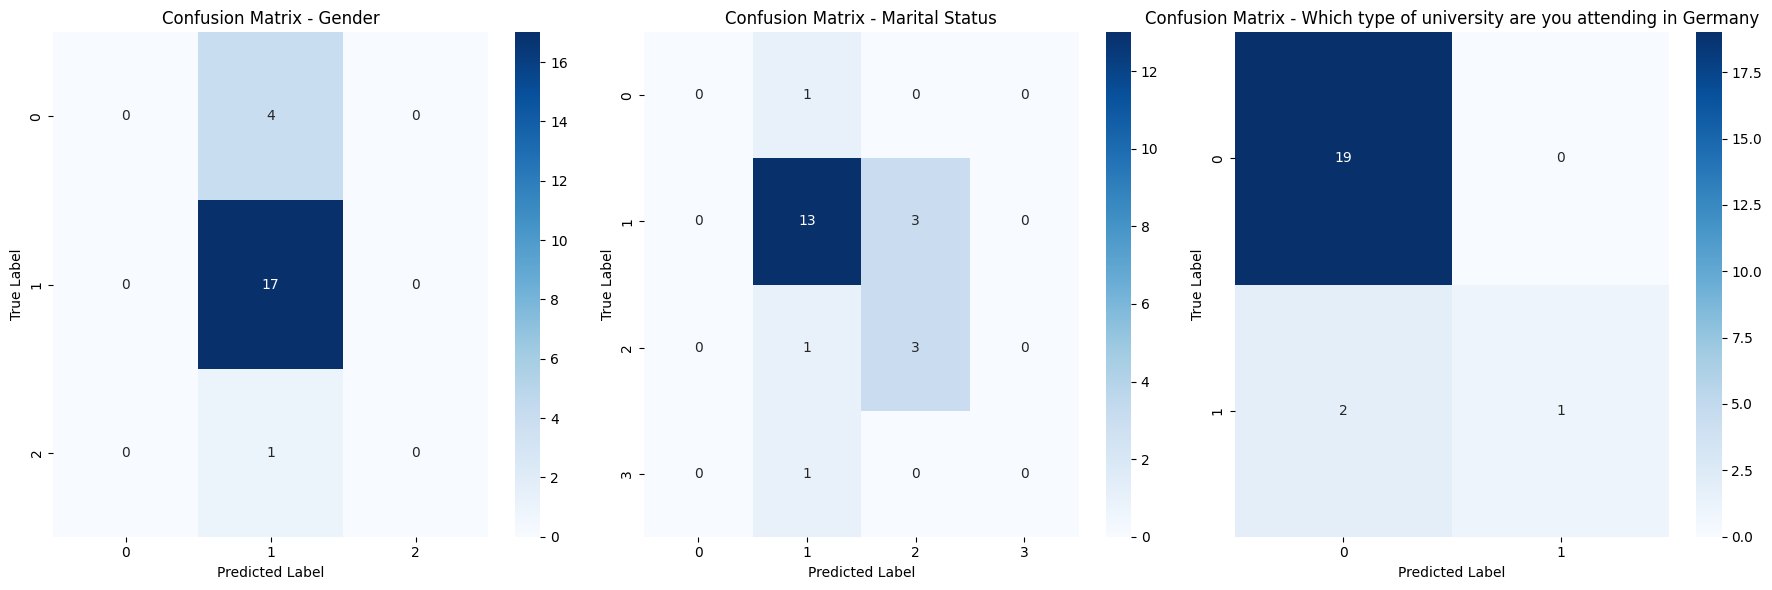

In [72]:
# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, target_name in enumerate(target_columns):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {target_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [73]:
# Inspect the columns of the DataFrame
print(df.columns)


Index(['Gender', 'Student Age', 'Marital Status', 'Continent of Origin',
       'Country of Origin (Nationality)', 'Current Level of Education',
       'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by faculty members in your de

In [74]:
# Correcting column names if needed
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verifying the corrected column names
print(df.columns)


Index(['gender', 'student_age', 'marital_status', 'continent_of_origin',
       'country_of_origin_(nationality)', 'current_level_of_education',
       'pursued_qualification',
       'which_type_of_university_are_you_attending_in_germany',
       'what_factors_influenced_your_decision_to_pursue_education_in_germany',
       'how_did_you_learn_about_educational_opportunities_in_germany',
       'what_was_your_academic_performance_in_your_previous_educational_institution(s)_before_coming_to_germany?',
       'how_do_you_typically_prepare_for_exams_and_assessments',
       'how_often_do_you_attend_lectures,_seminars,_and_tutorials',
       'have_you_utilized_academic_support_services_provided_by_your_university_(e.g.,_tutoring,_writing_centre)?',
       'language_of_instruction_of_your_study',
       'how_satisfied_are_you_with_the_feedback_provided_by_your_instructors_on_your_academic_work',
       'how_would_you_rate_the_level_of_academic_support_provided_by_faculty_members_in_your_dep

In [75]:
# Correcting column names if needed
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Define features and target variables
X = df.drop(columns=['gender', 'marital_status', 'which_type_of_university_are_you_attending_in_germany'])
y_gender = df['gender']
y_marital_status = df['marital_status']
y_university_type = df['which_type_of_university_are_you_attending_in_germany']


In [76]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt')  # Update with the actual filename if different

# Correcting column names if needed
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Dropping the 'timestamp' column as it's not relevant for modeling
df = df.drop(columns=['timestamp'])

# Display the first few rows of the dataframe to verify
df.head()


,gender,student_age,marital_status,continent_of_origin,country_of_origin_(nationality),current_level_of_education,pursued_qualification,which_type_of_university_are_you_attending_in_germany,what_factors_influenced_your_decision_to_pursue_education_in_germany,how_did_you_learn_about_educational_opportunities_in_germany,...,how_do_you_rate_the_quality_of_education_in_germany_compared_to_your_home_country,are_you_attending_german_language_school,levels_of_german_language_obtained,employment_status,state_/_district_of_residence_in_deutschland,name_of_institution,course_of_study,religion,spoken_languages,"on_a_scale_of_1_to_5,_how_satisfied_are_you_with_your_overall_experience_of_studying_in_germany?_______________________1_is_the_lowest_(tick_one_number)"
0,Male,46 - 55,Married,Africa,NaN,Master´s Degree,NaN,Private,Better Education,Internet Search,...,Better,Yes,A2,Student,NaN,NaN,NaN,Christianity,English,1.0
1,Male,26 - 35,Single,Africa,Ghana,Master´s Degree,Master´s Degree,Private,Foreign Exposure,Internet Search,...,Better,No,A1,"Student, Unemployed","Berlin, Hellersdorf",BSBI,Global MBA,Christianity,English,4.0
2,Male,26 - 35,Married,Africa,Ghanaian,Doctorate / PhD,Master´s Degree,Public,"Better Infrastucture, Foreign Exposure",Internet Search,...,Better,Yes,A2,Employed,Brandenburg,Potsdam University,Biology,Christianity,English,4.0
3,Male,36 -45,Single,Africa,Nigeria,Master´s Degree,Master´s Degree,Public,Better Education,Agent,...,Better,No,A2,Personal,Berlin,Personal,Law,Christianity,English,4.0
4,Male,18 - 25,Single,Africa,Nigeria,Bachelor´s Degree,Master´s Degree,Public,"Better Education, Greener Pasture","Internet Search, Friend",...,Best,No,"A1, A2",Student,Brandenburg,BTU,Cybersecurity,Christianity,English,3.0


In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Ignore warnings for better output readability
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt')  # Update with the actual filename if different

# Correcting column names if needed
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Dropping the 'timestamp' column as it's not relevant for modeling
df = df.drop(columns=['timestamp'])

# Separating numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Handling missing values
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Define features and target variables
X = df.drop(columns=['gender', 'marital_status', 'which_type_of_university_are_you_attending_in_germany'])
y_gender = df['gender']
y_marital_status = df['marital_status']
y_university_type = df['which_type_of_university_are_you_attending_in_germany']

# Convert categorical features to numeric
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encoding target variables
le_gender = LabelEncoder()
le_marital_status = LabelEncoder()
le_university_type = LabelEncoder()

y_gender = le_gender.fit_transform(y_gender)
y_marital_status = le_marital_status.fit_transform(y_marital_status)
y_university_type = le_university_type.fit_transform(y_university_type)

# Splitting the data into training and testing sets for each target variable
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y_gender, test_size=0.2, random_state=42)
X_train_marital, X_test_marital, y_train_marital, y_test_marital = train_test_split(X, y_marital_status, test_size=0.2, random_state=42)
X_train_university, X_test_university, y_train_university, y_test_university = train_test_split(X, y_university_type, test_size=0.2, random_state=42)

# Adjust SMOTE with fewer neighbors for gender
smote = SMOTE(random_state=42, k_neighbors=1)

# Applying SMOTE to the training data for gender
X_train_gender_resampled, y_train_gender_resampled = smote.fit_resample(X_train_gender, y_train_gender)

# Using RandomOverSampler for university type due to high imbalance
ros_university = RandomOverSampler(random_state=42)
X_train_university_resampled, y_train_university_resampled = ros_university.fit_resample(X_train_university, y_train_university)

# Using RandomOverSampler for marital status due to high imbalance
ros_marital = RandomOverSampler(random_state=42)
X_train_marital_resampled, y_train_marital_resampled = ros_marital.fit_resample(X_train_marital, y_train_marital)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function to perform GridSearchCV and print results
def perform_grid_search(X_train_resampled, y_train_resampled, X_test, y_test, target_name):
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_resampled, y_train_resampled)
    print(f"Best parameters for {target_name}: ", grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(f"{target_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{target_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Performing GridSearchCV for Gender prediction
perform_grid_search(X_train_gender_resampled, y_train_gender_resampled, X_test_gender, y_test_gender, "Gender")

# Performing GridSearchCV for Marital Status prediction
perform_grid_search(X_train_marital_resampled, y_train_marital_resampled, X_test_marital, y_test_marital, "Marital Status")

# Performing GridSearchCV for University Type prediction
perform_grid_search(X_train_university_resampled, y_train_university_resampled, X_test_university, y_test_university, "University Type")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gender:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Gender Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      0.89      0.85        19
           2       0.00      0.00      0.00         1

    accuracy                           0.74        23
   macro avg       0.27      0.30      0.28        23
weighted avg       0.67      0.74      0.70        23

Gender Confusion Matrix:
 [[ 0  3  0]
 [ 2 17  0]
 [ 0  1  0]]
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Marital Status:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Marital Status Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.74      0.85        19
           2   

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt')

# Display the first few rows of the dataset
df.head()


,Timestamp,Gender,Student Age,Marital Status,Continent of Origin,Country of Origin (Nationality),Current Level of Education,Pursued Qualification,Which type of university are you attending in Germany,What factors influenced your decision to pursue education in Germany,...,How do you rate the quality of education in Germany compared to your home country,Are you attending German Language School,Levels of German Language Obtained,Employment Status,State / District of Residence in Deutschland,Name of Institution,Course of Study,Religion,Spoken Languages,"On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany? 1 is the lowest (Tick one number)"
0,3/25/2024 23:17,Male,46 - 55,Married,Africa,NaN,Master´s Degree,NaN,Private,Better Education,...,Better,Yes,A2,Student,NaN,NaN,NaN,Christianity,English,1.0
1,3/26/2024 17:11,Male,26 - 35,Single,Africa,Ghana,Master´s Degree,Master´s Degree,Private,Foreign Exposure,...,Better,No,A1,"Student, Unemployed","Berlin, Hellersdorf",BSBI,Global MBA,Christianity,English,4.0
2,3/26/2024 17:24,Male,26 - 35,Married,Africa,Ghanaian,Doctorate / PhD,Master´s Degree,Public,"Better Infrastucture, Foreign Exposure",...,Better,Yes,A2,Employed,Brandenburg,Potsdam University,Biology,Christianity,English,4.0
3,3/26/2024 17:58,Male,36 -45,Single,Africa,Nigeria,Master´s Degree,Master´s Degree,Public,Better Education,...,Better,No,A2,Personal,Berlin,Personal,Law,Christianity,English,4.0
4,3/26/2024 18:02,Male,18 - 25,Single,Africa,Nigeria,Bachelor´s Degree,Master´s Degree,Public,"Better Education, Greener Pasture",...,Best,No,"A1, A2",Student,Brandenburg,BTU,Cybersecurity,Christianity,English,3.0


In [80]:
# Display the columns in the DataFrame
print(df.columns)



Index(['Timestamp', 'Gender', 'Student Age', 'Marital Status',
       'Continent of Origin', 'Country of Origin (Nationality)',
       'Current Level of Education', 'Pursued Qualification',
       'Which type of university are you attending in Germany',
       'What factors influenced your decision to pursue education in Germany',
       'How did you learn about educational opportunities in Germany',
       'What was your academic performance in your previous educational institution(s) before coming to Germany? ',
       'How do you typically prepare for exams and assessments',
       'How often do you attend lectures, seminars, and tutorials',
       'Have you utilized academic support services provided by your university (e.g., tutoring, writing centre)?',
       'Language of Instruction of your study',
       'How satisfied are you with the feedback provided by your instructors on your academic work',
       'How would you rate the level of academic support provided by faculty membe

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt')

# Display the first few rows of the dataset
print(df.head())

# Display the columns in the DataFrame
print(df.columns)

# Define features and target variable for academic performance prediction
# Update these columns based on the actual columns in your DataFrame
features = ['age', 'gender', 'parent_education', 'previous_grades', 'attendance', 'extracurricular_activities', 'socioeconomic_status']
target = 'future_grades'

# Check if all the features exist in the DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"The following features are missing in the dataset: {missing_features}")
else:
    # Separate the features and target variable
    X = df[features]
    y = df[target]

    # Define the column transformer for preprocessing
    numeric_features = ['age', 'previous_grades', 'attendance', 'socioeconomic_status']
    categorical_features = ['gender', 'parent_education', 'extracurricular_activities']

    # Preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    # Preprocessing for categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combine the transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Apply the transformations
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    # Define the model
    rf = RandomForestRegressor(random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Display the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the results
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)


         Timestamp Gender Student Age Marital Status Continent of Origin  \
0  3/25/2024 23:17   Male     46 - 55        Married              Africa   
1  3/26/2024 17:11   Male     26 - 35         Single              Africa   
2  3/26/2024 17:24   Male     26 - 35        Married              Africa   
3  3/26/2024 17:58   Male      36 -45         Single              Africa   
4  3/26/2024 18:02   Male     18 - 25         Single              Africa   

  Country of Origin (Nationality) Current Level of Education  \
0                             NaN            Master´s Degree   
1                           Ghana            Master´s Degree   
2                       Ghanaian             Doctorate / PhD   
3                        Nigeria             Master´s Degree   
4                         Nigeria          Bachelor´s Degree   

  Pursued Qualification Which type of university are you attending in Germany  \
0                   NaN                                            Private   

In [82]:
import pandas as pd

# URL to the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"

# Load the dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head(), df.columns


(         Timestamp Gender Student Age Marital Status Continent of Origin  \
 0  3/25/2024 23:17   Male     46 - 55        Married              Africa   
 1  3/26/2024 17:11   Male     26 - 35         Single              Africa   
 2  3/26/2024 17:24   Male     26 - 35        Married              Africa   
 3  3/26/2024 17:58   Male      36 -45         Single              Africa   
 4  3/26/2024 18:02   Male     18 - 25         Single              Africa   
 
   Country of Origin (Nationality) Current Level of Education  \
 0                             NaN            Master´s Degree   
 1                           Ghana            Master´s Degree   
 2                       Ghanaian             Doctorate / PhD   
 3                        Nigeria             Master´s Degree   
 4                         Nigeria          Bachelor´s Degree   
 
   Pursued Qualification Which type of university are you attending in Germany  \
 0                   NaN                                      

In [83]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target variable
features = ['Gender', 'Student Age', 'Marital Status', 'Continent of Origin',
            'Current Level of Education', 'Which type of university are you attending in Germany',
            'Employment Status', 'State / District of Residence in Deutschland', 'Religion']
target = 'Are you attending German Language School'

# Handle missing values
df_imputed = df.copy()
imputer = SimpleImputer(strategy='most_frequent')
df_imputed[features] = imputer.fit_transform(df_imputed[features])

# Encode categorical variables
label_encoders = {}
for column in features:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

# Encode target variable
target_encoder = LabelEncoder()
df_imputed[target] = target_encoder.fit_transform(df_imputed[target])

# Split the data
X = df_imputed[features]
y = df_imputed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report for German Language School Attendance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for German Language School Attendance:")
print(confusion_matrix(y_test, y_pred))


Classification Report for German Language School Attendance:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.85      0.94      0.89        18

    accuracy                           0.83        23
   macro avg       0.76      0.67      0.70        23
weighted avg       0.81      0.83      0.81        23

Confusion Matrix for German Language School Attendance:
[[ 2  3]
 [ 1 17]]


In [84]:
# Target variable for employment status
target_employment = 'Employment Status'

# Encode target variable for employment status
df_imputed[target_employment] = target_encoder.fit_transform(df_imputed[target_employment])

# Split the data
X = df_imputed[features]
y = df_imputed[target_employment]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report for Employment Status:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Employment Status:")
print(confusion_matrix(y_test, y_pred))


Classification Report for Employment Status:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       0.95      1.00      0.98        20
           4       0.00      0.00      0.00         1

    accuracy                           0.96        23
   macro avg       0.65      0.67      0.66        23
weighted avg       0.92      0.96      0.94        23

Confusion Matrix for Employment Status:
[[ 2  0  0]
 [ 0 20  0]
 [ 0  1  0]]


In [85]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt"
df = pd.read_csv(url)

# Check for missing values in target variables
print(df[['Are you attending German Language School', 'Employment Status',
          'On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) ']].isnull().sum())



Are you attending German Language School                                                                                                                     3
Employment Status                                                                                                                                            2
On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number)     1
dtype: int64


In [86]:
# Drop rows with missing target values
df_cleaned = df.dropna(subset=['Are you attending German Language School', 'Employment Status',
                               'On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) '])


In [87]:
# Select features and target variable
features = ['Gender', 'Student Age', 'Marital Status', 'Continent of Origin',
            'Current Level of Education', 'Which type of university are you attending in Germany',
            'Employment Status', 'State / District of Residence in Deutschland', 'Religion']
target = 'Are you attending German Language School'

# Handle missing values and encode categorical variables
df_imputed = df_cleaned.copy()
imputer = SimpleImputer(strategy='most_frequent')
df_imputed[features] = imputer.fit_transform(df_imputed[features])

label_encoders = {}
for column in features:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

target_encoder = LabelEncoder()
df_imputed[target] = target_encoder.fit_transform(df_imputed[target])

# Split the data
X = df_imputed[features]
y = df_imputed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report for German Language School Attendance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for German Language School Attendance:")
print(confusion_matrix(y_test, y_pred))


Classification Report for German Language School Attendance:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.85      0.94      0.89        18

    accuracy                           0.82        22
   macro avg       0.68      0.60      0.61        22
weighted avg       0.79      0.82      0.79        22

Confusion Matrix for German Language School Attendance:
[[ 1  3]
 [ 1 17]]


In [88]:
# Target variable for employment status
target_employment = 'Employment Status'

# Encode target variable for employment status
df_imputed[target_employment] = target_encoder.fit_transform(df_imputed[target_employment])

# Split the data
X = df_imputed[features]
y = df_imputed[target_employment]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report for Employment Status:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Employment Status:")
print(confusion_matrix(y_test, y_pred))


Classification Report for Employment Status:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         1

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion Matrix for Employment Status:
[[ 2  0  0]
 [ 0 19  0]
 [ 0  0  1]]


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Target variable for satisfaction
target_satisfaction = 'On a scale of 1 to 5, how satisfied are you with your overall experience of studying in Germany?                       1 is the lowest (Tick one number) '

# Ensure the target variable is numeric
df_imputed[target_satisfaction] = df_imputed[target_satisfaction].astype(float)

# Split the data
X = df_imputed[features]
y = df_imputed[target_satisfaction]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) for Satisfaction: {mse}")
print(f"R-squared (R2) Score for Satisfaction: {r2}")


Mean Squared Error (MSE) for Satisfaction: 1.345403194215217
R-squared (R2) Score for Satisfaction: -0.26934726315821655


In [90]:
# Target variable for employment status
target_employment = 'Employment Status'

# Encode target variable for employment status
df_imputed[target_employment] = target_encoder.fit_transform(df_imputed[target_employment])

# Split the data
X = df_imputed[features]
y = df_imputed[target_employment]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report for Employment Status:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Employment Status:")
print(confusion_matrix(y_test, y_pred))


Classification Report for Employment Status:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         1

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion Matrix for Employment Status:
[[ 2  0  0]
 [ 0 19  0]
 [ 0  0  1]]


Classification Report for Gender:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.95      1.00      0.97        19
           2       0.00      0.00      0.00         1

    accuracy                           0.96        23
   macro avg       0.65      0.67      0.66        23
weighted avg       0.92      0.96      0.94        23



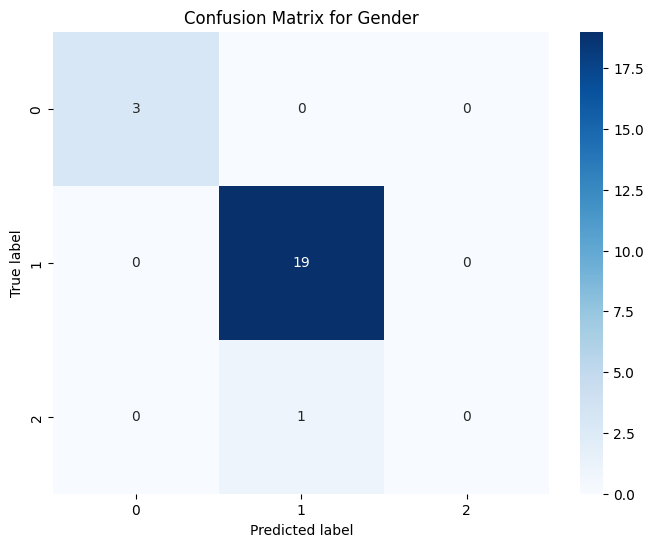

Classification Report for Marital Status:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         4

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



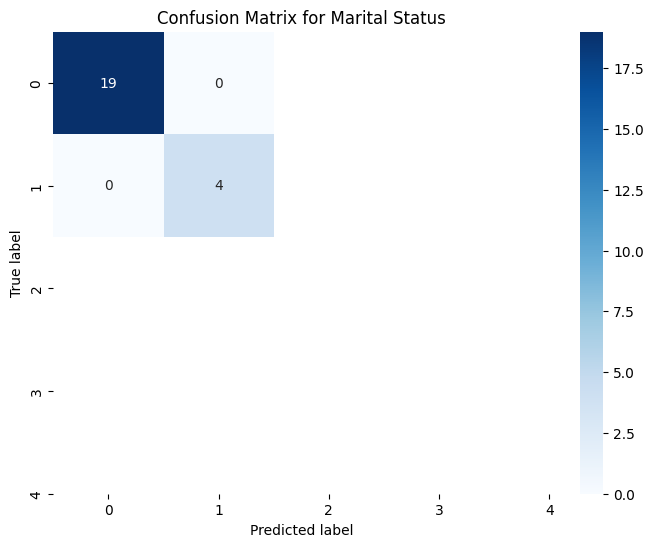

Classification Report for Which type of university are you attending in Germany:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         4

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



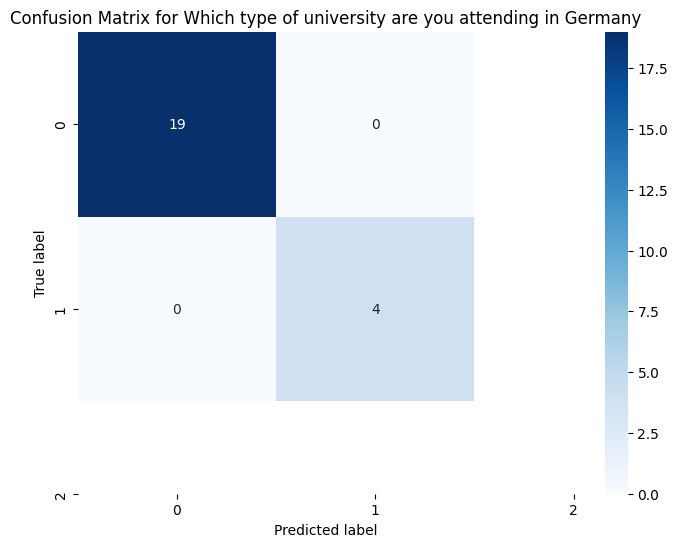

Classification Report for Are you attending German Language School:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.85      0.94      0.89        18

    accuracy                           0.83        23
   macro avg       0.76      0.67      0.70        23
weighted avg       0.81      0.83      0.81        23



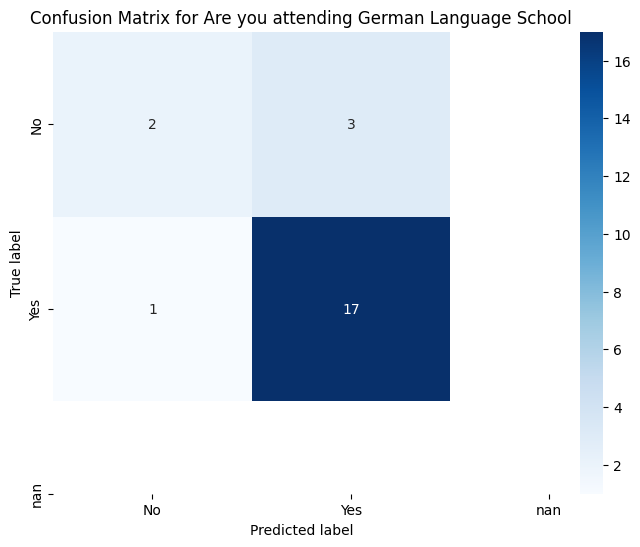

Classification Report for Employment Status:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       0.95      1.00      0.98        20
           4       0.00      0.00      0.00         1

    accuracy                           0.96        23
   macro avg       0.65      0.67      0.66        23
weighted avg       0.92      0.96      0.94        23



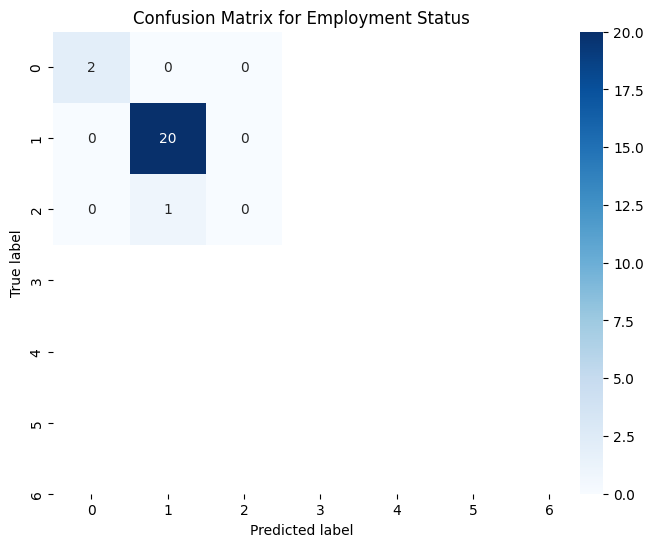

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
url = 'https://drive.google.com/uc?id=1nZEPkWZRThw6TIV3Kl_AjW1vuVATrFtt'
df = pd.read_csv(url)

# Select features and target variables
features = ['Gender', 'Student Age', 'Marital Status', 'Continent of Origin',
            'Current Level of Education', 'Which type of university are you attending in Germany',
            'Employment Status', 'State / District of Residence in Deutschland', 'Religion']
targets = ['Gender', 'Marital Status', 'Which type of university are you attending in Germany',
           'Are you attending German Language School', 'Employment Status']

# Handle missing values
df_imputed = df.copy()
imputer = SimpleImputer(strategy='most_frequent')
df_imputed[features] = imputer.fit_transform(df_imputed[features])

# Encode categorical variables
label_encoders = {}
for column in features:
    le = LabelEncoder()
    df_imputed[column] = le.fit_transform(df_imputed[column])
    label_encoders[column] = le

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Train and evaluate models for each target variable
for target in targets:
    # Encode target variable
    target_encoder = LabelEncoder()
    df_imputed[target] = target_encoder.fit_transform(df_imputed[target])

    # Split the data
    X = df_imputed[features]
    y = df_imputed[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = rf_classifier.predict(X_test_scaled)
    print(f"Classification Report for {target}:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=target_encoder.classes_, title=f"Confusion Matrix for {target}")

# Note: Make sure to adapt the class names (target_encoder.classes_) to match your specific target classes if necessary.



In [93]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
